# Final Project BDA
### Student: Giorgio Rossi
Analysis of the vaccine impact in Italy: Twitter vs government data

## Libraries

In [1]:
import pandas as pd
from pymongo import MongoClient
from collections import Counter
import numpy as np
import operator
from datetime import datetime
from pprint import pprint


import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 25)

## MongoDB Database

In [2]:
# Establish connection with database
client = MongoClient('localhost', 27017, username='mongoadmin', password='pass1234')
db = client.test
col = db.tweets

print('Connected!')

Connected!


## Structure of a tweet
references:
- [Tweet object](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet)
- [User object](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/user)

The structure has a lot of legacy fiels, and is affected by the history of Twitter. For example the field 'text' can hold only 140 characters, the text that exceed that limit is stored in the 'full_text' field of the 'extended_tweet' substructure. The flag 'truncated' store the binary information on the length of the tweet: 'is less than 14 chars' vs 'is more than 140 chars'.


In [3]:

simple_tweet = db.tweets.find_one({'entities.hashtags.text': 'propaganda'}, {'text':1,
'entities.hashtags':1})

#simple_tweet = db.tweets.find_one({'entities.hashtags.text': 'Germania'}, {'text':1,'entities.hashtags':1})
#simple_tweet = db.tweets.find({'user.screen_name': 'matteorenzi'},{'text':1 'entities.hashtags':1})
#pprint(simple_tweet)




In [4]:
my_tweets = db.tweets.find({},{'lang':1, '_id':0, 'text':1,
'entities.hashtags':1,'in_reply_to_status_id':1, 'is_quote_status':1,
'retweeted_status':1, 'user.screen_name':1, 'user.location':1})
numTweets = db.tweets.count()

print(f'The total number of tweets streamed is {numTweets}')

The total number of tweets streamed is 415432


## Languages

In [5]:
# Plot of Languages (autodetected by Twitter)
my_tweets.rewind() #Reset cursor
langsList = []
for t in my_tweets:
    langsList.append(t['lang'])
D = Counter(langsList)

print(f'The only language available for the tweets is Italian, there are no outliers')
D.most_common(5)

The only language available for the tweets is Italian, there are no outliers


[('it', 415432)]

## Most frequent hashtags

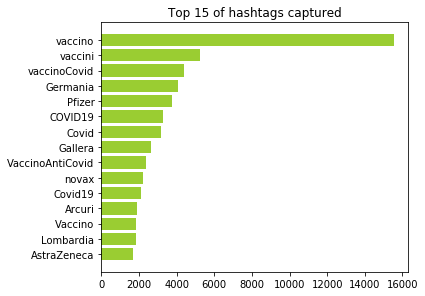

In [6]:
# Plot hashtags
my_tweets.rewind()
hashList = []
for t in my_tweets:
    for e in t['entities']['hashtags']:
        h = e['text']
        hashList.append(h)
D = Counter(hashList)
subset = dict(D.most_common(15))

sorted_subset = sorted(subset.items(), key=operator.itemgetter(1))

# ----------- Horizontal Bar Plot ------------------------
pos = range(len(sorted_subset))
plt.barh(pos, [val[1] for val in sorted_subset], align = 'center', color =
'yellowgreen')
plt.yticks(pos, [val[0] for val in sorted_subset])
plt.tight_layout()
plt.title('Top 15 of hashtags captured')
plt.plot()
plt.savefig('images/top_hashtag.png')

## Grouping hashtags in themes

In [7]:
# 200 top hashtags
subset = dict(D.most_common(200))

In [8]:
vaccine = ['vaccinati', 'mRNA', 'vaccination', 'vaccincovid', 'vaccinocovid','VaccinoCovid', 'vaccino', 'vaccini', 'vaccinoCovid',  'VaccinoAntiCovid',  'Vaccino',  'vaccinazione', 'coronavirus', 'Vaccini', 'vaccinazioni', 'VACCINO',  'vaccinale', 'Vaccinocovid', 'VACCINOANTICOVID']
covid = ['SARSCoV2', 'COVID19', 'Covid', 'covid', 'Covid19','COVIDー19', 'Coronavirus','Covid_19', 'covid19', 'COVID', 'anticovid', 'pandemia', 'COVID19italia', 'contagi']
location = ['Danimarca','Spagna', 'Germania', 'Lombardia', 'Italia', 'Israele', 'Siracusa', 'Sicilia', 'germania', 'UK', 'Polonia', 'Cina', 'Cuba', 'GranBretagna','Campania','Roma','Sardegna', 'Portogallo', 'Messico', 'Berlino']
big_pharma = ['pfizer', 'Biontech', 'Pfizer', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Astrazeneca', 'SputnikV', 'Oxford', 'BioNtech']
politics = [ 'CONTE', 'Fontana','Regioni','conferenzastampa', 'conte', 'Pd', 'Governo', 'RecoveryFund', 'RecoveryPlan', 'Salvini', 'Gallera', 'Arcuri', 'DeLuca', 'Mattarella', 'Conte', 'sovranista', 'Bonafede', 'Speranza', 'crisidigoverno', 'Ichino', 'governo', 'Renzi', 'governodiperacottari', 'arcuri', 'sinistra', 'GovernodellaVergogna', 'Zaia', 'Lega', 'democrazia', 'CommissariatelaLombardia', 'CASELLATI', 'SPERANZA', 'Benaglia', 'CALENDA', 'DELUCA','governocriminale', 'discorsodifineanno', 'scuola' 'DittaturaSanitaria', 'ascoltiamoMATTARELLAperchè']
foreign_politics = ['Trump', 'KamalaHarris', 'Merkel', 'Biden']
disinformation = ['novax', 'NoVaccinoAiNoVax', 'negazionisti', 'NoVax', 'BillGates', 'Corvelva', 'FakeNews', 'propaganda', 'cavie' ]
slogan = ['esempidelcazzo', 'ripetiamoloinsieme', 'vaccinareh24', 'iostocongiulia', 'pessimaidea', 'facciamorete', 'quantivaccini', 'iomivaccino', 'donaVaccinoAUnMigrante']
vday = ['vaccinoday', 'VaccineDay', 'VDAY', 'Vday' ]
science = ['Sileri', 'ClaudiaAlivernini', 'medici', 'Spallanzani', 'Crisanti', 'Galli', 'Bassetti', 'Pregliasco', 'ricerca', 'Burioni', 'Ippolito', 'Sanità', 'RT']
restriction = ['lockdown', 'liberta', 'sicurezza', 'riaperture',  'zonarossa']
media = ['quartarepubblica', 'novanews24', 'tg2', 'ANSA', 'staseraitalia','DomenicaIn', 'TG4', 'LaVeritàdioggi', 'propagandalive', 'StaseraItalia', 'primapagina', 'news', 'LERCIOSTORY', 'gfvip', 'QuartaRepubblica', 'blob', 'tagada', 'GFVIP','Corriere', 'agorarai', 'lariachetira']
institution = ['LaCommissioneEuropea', 'EMA', 'OMS', 'Aifa', 'AIFA','UE', 'Europa', 'Ue', 'FDA', 'Oms', 'Ema']
dates = ['2gennaio', '28dicembre', '1gennaio', '30dicembre', '29dicembre', '3gennaio', '3gennaio2021', '27dicembre', 'Befana']
insult = ['Covidioti','covidioti', 'Poveraccismi']
other = ['Alitalia', 'fiore', 'neve', 'Voss', 'Bergoglio', 'italiani', 'IItaliani', 'COMPAGNI']

hashtags_labelled = {
    'vaccine': vaccine,
    'covid': covid,
    'location': location,
    'big_pharma': big_pharma,
    'politics': politics,
    'foreign_politics': foreign_politics,
    'disinformation': disinformation,
    'vday': vday,
    'science': science,
    'restriction': restriction,
    'media': media,
    'institution': institution,
    'dates': dates,
    'insult': insult,
    'other': other
}

In [9]:
pprint(hashtags_labelled)

{'big_pharma': ['pfizer',
                'Biontech',
                'Pfizer',
                'AstraZeneca',
                'PfizerBioNTech',
                'Moderna',
                'Astrazeneca',
                'SputnikV',
                'Oxford',
                'BioNtech'],
 'covid': ['SARSCoV2',
           'COVID19',
           'Covid',
           'covid',
           'Covid19',
           'COVIDー19',
           'Coronavirus',
           'Covid_19',
           'covid19',
           'COVID',
           'anticovid',
           'pandemia',
           'COVID19italia',
           'contagi'],
 'dates': ['2gennaio',
           '28dicembre',
           '1gennaio',
           '30dicembre',
           '29dicembre',
           '3gennaio',
           '3gennaio2021',
           '27dicembre',
           'Befana'],
 'disinformation': ['novax',
                    'NoVaccinoAiNoVax',
                    'negazionisti',
                    'NoVax',
                    'BillGates',
          

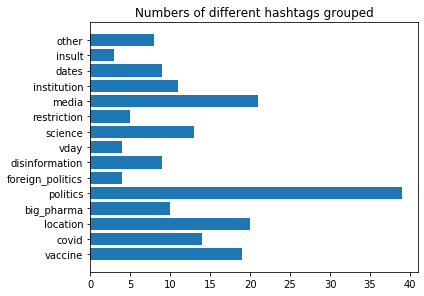

In [10]:
hashtags_labelled_keys = [*hashtags_labelled]
hashtags_labelled_count = [len(hashtags_labelled[x]) for x in hashtags_labelled_keys]

plt.barh(hashtags_labelled_keys, hashtags_labelled_count, align = 'center')
#plt.yticks(hashtags_labelled_keys, hashtags_labelled_count)
plt.tight_layout()
plt.title('Numbers of different hashtags grouped')
plt.plot()
plt.savefig('images/num_hashtahgs_each_group.png')

## Themes analysis - all the tweets

In [11]:
label_count = hashtags_labelled.copy()

for label in hashtags_labelled:
    count = 0
    for ht in subset:
        if (ht in hashtags_labelled[label]): 
            # se l'hashtag è nel gruppo 'vaccine' ad esempio
            # somma i suoi
            count += subset[ht]
    label_count[label] = count

label_count_sorted = sorted(label_count.items(), key=lambda item: item[1])

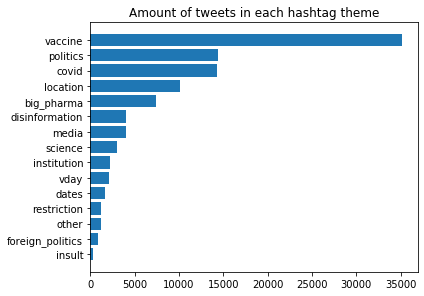

In [12]:
label_count_sorted_keys = [x[0] for x in label_count_sorted]
label_count_sorted_count = [x[1] for x in label_count_sorted]

plt.barh(label_count_sorted_keys, label_count_sorted_count, align = 'center')
plt.tight_layout()
plt.title('Amount of tweets in each hashtag theme')
plt.plot()
plt.savefig('images/hashtags_grouped_bar.png')

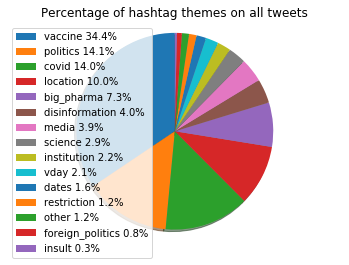

In [13]:
labels = list(reversed(label_count_sorted_keys))
data = list(reversed(label_count_sorted_count))
sum_data = sum(data)

for index, label in enumerate(labels):
    labels[index] = f"{label} {round(data[index]/sum_data*100, 1)}%"

plt.pie(data, shadow=True, startangle=90)#, autopct='%1.1f%%', textprops={'fontsize': 9})
plt.axis('equal')
plt.title('Percentage of hashtag themes on all tweets')
plt.legend(labels, loc="best")
#plt.tight_layout()
plt.plot()

plt.savefig('images/hashtags_grouped_pie.png')

## Themes analysis - influencers

## Percentage of retweets, replies, quotations or original tweets

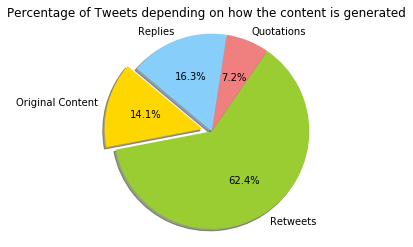

In [14]:
# Plot how many of them are retweets, replies, quotations or original tweets
my_tweets.rewind() #Reset cursor
retweets = replies = quotations = originals = 0
for t in my_tweets:
    if t.get('retweeted_status') is not None:
        retweets=retweets+1
    elif t['is_quote_status'] is not False:
        quotations = quotations+1
    elif t.get('in_reply_to_status_id') is not None:
        replies = replies+1
    else:
        originals = originals+1


# ----------- Pie Chart ------------------------
labels = 'Original Content', 'Retweets', 'Quotations', 'Replies'
sizes = [originals, retweets, quotations, replies]
frequencies = [x/numTweets for x in sizes]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0) # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of Tweets depending on how the content is generated')
plt.plot()
plt.savefig('images/tweets_pie.png')

## Locations

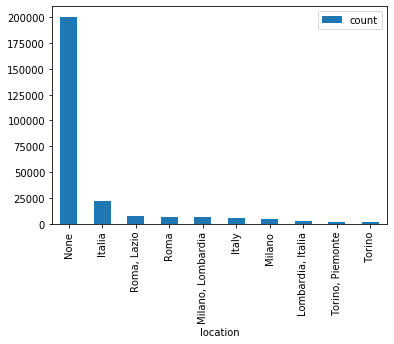

In [15]:
# locations
loc_list = []

for loc in col.find({}, {'user.location':1}):
    loc_list.append(loc['user']['location'])

loc_counter = Counter(loc_list)

locs = []
counts = []
for loc in loc_counter.most_common(10):
    locs.append(str(loc[0]))
    counts.append(loc[1])

# ----------- Vertical Bar Plot ------------------------
locations = pd.DataFrame({'location': locs, 'count': counts})
locations.plot.bar(x='location', y='count')
plt.savefig('images/locations_count.png')

I have too many missing values for the location attribute, so I have decided to discard those informations

## Analysis

In [16]:
# function for parsing the date of the tweet e retrieve the hour
def parse_datetime(tweet):
    dtime = tweet['created_at']
    new_datetime = datetime.strftime(datetime.strptime(dtime,'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:00:00')
    return new_datetime


### All tweets

In [17]:
# all tweets
raw_tweets_all = db.tweets.find({}, {'created_at':1})
num_raw_tweet = raw_tweets_all.count()
num_raw_tweet


415432

### Influencers
Top 200 people with a lot of followers

In [18]:
# influencers
from bson.son import SON

pipeline = [
    {'$group': {'_id': '$user.screen_name', 'followers': {'$last':'$user.followers_count'}}},
    {"$sort": SON([("followers", -1)])},
    {'$limit': 200}
]
# ascending 1, descending -1

res = col.aggregate(pipeline)

influencers = []

print('First ten people (in IT) with a great amount of followers, tweeting on vaccine:')
index = 0
for sample in res:
    influencers.append(sample['_id'])
    if(index < 10):
        print(sample)
    index +=1

First ten people (in IT) with a great amount of followers, tweeting on vaccine:
{'_id': 'matteorenzi', 'followers': 3393684}
{'_id': 'SkyTG24', 'followers': 3185563}
{'_id': 'repubblica', 'followers': 3084405}
{'_id': 'SkySport', 'followers': 2534859}
{'_id': 'Corriere', 'followers': 2324015}
{'_id': 'redazioneiene', 'followers': 2308240}
{'_id': 'fattoquotidiano', 'followers': 2040869}
{'_id': 'Gazzetta_it', 'followers': 1763417}
{'_id': 'spinozait', 'followers': 1753552}
{'_id': 'marcotravaglio', 'followers': 1603971}


In [19]:
raw_tweets_influencers = db.tweets.find({'user.screen_name': { '$in': influencers}}, {'created_at':1, 'user.screen_name':1})
#num_raw_tweet = db.tweets.count()
num_raw_tweet = raw_tweets_influencers.count()
num_raw_tweet

2473

### Themes analysis in the influencers tweets

In [20]:
influencers_tweets = db.tweets.find({'user.screen_name': { '$in': influencers}}, {'created_at':1, 'user.screen_name':1, 'entities.hashtags':1})

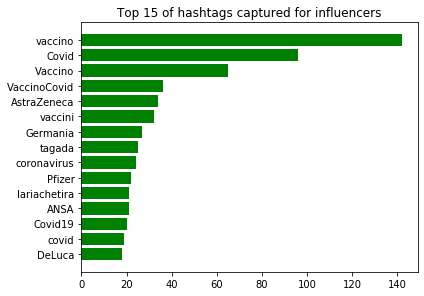

In [21]:
# Plot hashtags
hashList = []
for t in influencers_tweets:
    for e in t['entities']['hashtags']:
        h = e['text']
        hashList.append(h)
D = Counter(hashList)
subset = dict(D.most_common(15))

sorted_subset = sorted(subset.items(), key=operator.itemgetter(1))

# ----------- Horizontal Bar Plot ------------------------
pos = range(len(sorted_subset))
plt.barh(pos, [val[1] for val in sorted_subset], align = 'center', color ='green')
plt.yticks(pos, [val[0] for val in sorted_subset])
plt.tight_layout()
plt.title('Top 15 of hashtags captured for influencers')
plt.plot()
plt.savefig('images/top_hashtag_influencers.png')

In [22]:
influencers_hashList = dict(D)

label_count = hashtags_labelled.copy()

for label in hashtags_labelled:
    count = 0
    for ht in influencers_hashList:
        if (ht in hashtags_labelled[label]): 
            # se l'hashtag è nel gruppo 'vaccine' ad esempio
            # somma i suoi
            count += influencers_hashList[ht]
    label_count[label] = count

label_count_sorted = sorted(label_count.items(), key=lambda item: item[1])
label_count_sorted

[('insult', 0),
 ('other', 3),
 ('restriction', 6),
 ('vday', 10),
 ('foreign_politics', 12),
 ('institution', 16),
 ('disinformation', 17),
 ('dates', 24),
 ('science', 45),
 ('big_pharma', 67),
 ('location', 74),
 ('media', 83),
 ('politics', 100),
 ('covid', 186),
 ('vaccine', 362)]

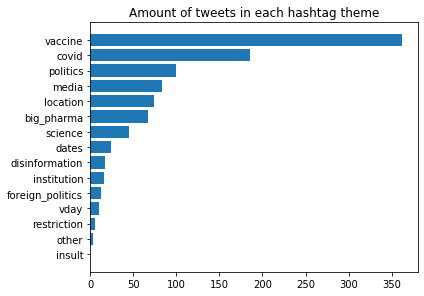

In [23]:
label_count_sorted_keys = [x[0] for x in label_count_sorted]
label_count_sorted_count = [x[1] for x in label_count_sorted]

plt.barh(label_count_sorted_keys, label_count_sorted_count, align = 'center')
plt.tight_layout()
plt.title('Amount of tweets in each hashtag theme')
plt.plot()
plt.savefig('images/hashtags_grouped_bar_influencers.png')

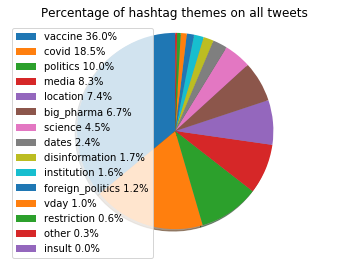

In [24]:
labels = list(reversed(label_count_sorted_keys))
data = list(reversed(label_count_sorted_count))
sum_data = sum(data)

for index, label in enumerate(labels):
    labels[index] = f"{label} {round(data[index]/sum_data*100, 1)}%"

plt.pie(data, shadow=True, startangle=90)#, autopct='%1.1f%%', textprops={'fontsize': 9})
plt.axis('equal')
plt.title('Percentage of hashtag themes on all tweets')
plt.legend(labels, loc="best")
#plt.tight_layout()
plt.plot()

plt.savefig('images/hashtags_grouped_pie_influencers.png')

### Verified
Users with the verified profile

In [25]:
raw_tweets_verified = db.tweets.find({'user.verified': True}, {'created_at':1})
num_raw_tweet = raw_tweets_verified.count()
num_raw_tweet

4027

In [26]:
def parse_and_resample(raw_tweets):   
    # parse datetime
    tweets = []
    for tw in raw_tweets:
        tweets.append(parse_datetime(dict(tw)))

    # dataframe with all tweets
    index = pd.to_datetime(tweets)
    tweets_num = [1 for x in tweets]
    tweetframe = pd.DataFrame(tweets_num, columns=['tweets'], index = index)

    # resample
    new_df = pd.DataFrame()
    new_df['count'] = tweetframe.tweets.resample('H').sum()
    new_df['day'] = new_df.index.to_pydatetime()
    new_df['day'] = new_df['day'].apply(lambda date: datetime.strptime(str(date)[0:-9], '%Y-%m-%d'))

    return new_df

def plot_count(df):
    # ----------- Line Plot ------------------------
    df.ix[:,['count']].plot()
    plt.savefig('images/week_all_data.png')

In [27]:
tweets_verified = parse_and_resample(raw_tweets_verified)
tweets_influencers = parse_and_resample(raw_tweets_influencers)
new_df = parse_and_resample(raw_tweets_all)

In [28]:
compare_df = pd.DataFrame()

compare_df['verified'] = tweets_verified['count']#.reset_index(drop=True)
compare_df['influencers'] = tweets_influencers['count']#.reset_index(drop=True)
compare_df.head(10)

,verified,influencers
2020-12-28 04:00:00,3,2
2020-12-28 05:00:00,10,9
2020-12-28 06:00:00,42,34
2020-12-28 07:00:00,63,47
2020-12-28 08:00:00,44,27
2020-12-28 09:00:00,49,32
2020-12-28 10:00:00,61,38
2020-12-28 11:00:00,84,53
2020-12-28 12:00:00,41,25
2020-12-28 13:00:00,49,43


### "Verified" and "Influencer" user tweets and All tweets
Comparison between this two category about the pubblication of tweets in the week Dec 28th 2020 - Jan 3rd 2021, furthermore plot of the general pattern of the tweets published in the same week.


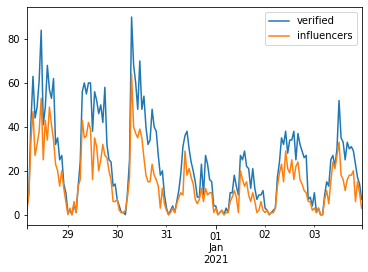

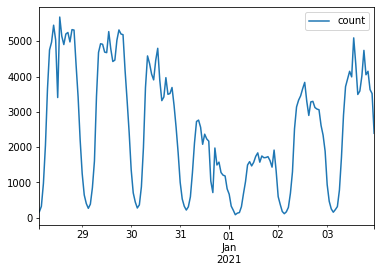

In [29]:
compare_df.plot()
plt.savefig('images/week_infl_ver.png')

plot_count(new_df)

### Hourly analysis of all tweets

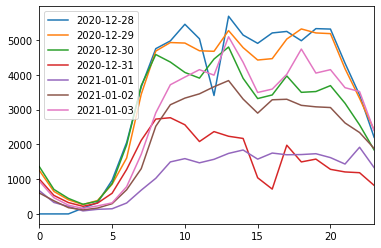

In [30]:
hours = new_df.groupby('day')

day_view = pd.DataFrame(index=range(24))

for day in hours.groups.keys():
    day_name = str(day)[0:-9]

    # first day
    if(day_name == '2020-12-28'):
        first_day_03_23 = pd.DataFrame(hours.get_group('2020-12-28')['count'].reset_index(drop=True))
        first_day_00_02 = pd.DataFrame({'count': [0, 0, 0]})
        first_day = pd.concat([first_day_00_02, first_day_03_23], ignore_index=True) 
        day_view['2020-12-28'] = first_day

    else:      
        day_view[day_name] = hours.get_group(day_name)['count'].reset_index(drop=True)


# ----------- Multi-Line Plot ------------------------
day_view.plot()  
plt.savefig('images/hours_all_line.png')      


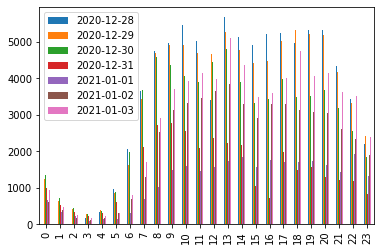

In [31]:
# ----------- Vertical Multi-Bar Plot ------------------------
day_view.plot.bar()
plt.savefig('images/hours_all_bar.png')

In [32]:
day_view.head(24)

,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03
0,0,1249,1359,1002,668,600,941
1,0,646,705,532,330,378,467
2,0,405,446,326,215,179,251
3,167,268,277,219,87,116,158
4,324,386,366,311,132,169,231
5,969,852,877,594,148,294,317
6,2055,1608,1987,1279,314,695,784
7,3652,3439,3689,2115,683,1300,1713
8,4752,4682,4583,2727,1024,2520,2906
9,4974,4928,4367,2766,1495,3139,3714


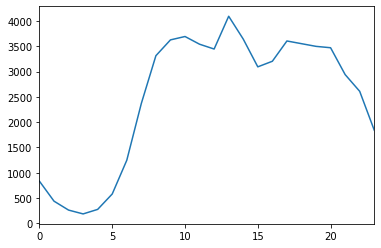

In [33]:
# weekly mean
day_view.mean(axis = 1).plot()
plt.savefig('images/day_all_line_avg.png')

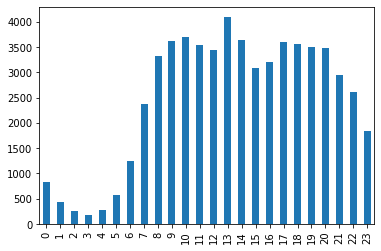

In [34]:
# weekly mean
day_view.mean(axis = 1).plot.bar()
plt.savefig('images/day_all_bar_avg.png')

## Vaccine Data
source: [Italian Government](https://app.powerbi.com/view?r=eyJrIjoiMzg4YmI5NDQtZDM5ZC00ZTIyLTgxN2MtOTBkMWM4MTUyYTg0IiwidCI6ImFmZDBhNzVjLTg2NzEtNGNjZS05MDYxLTJjYTBkOTJlNDIyZiIsImMiOjh9)

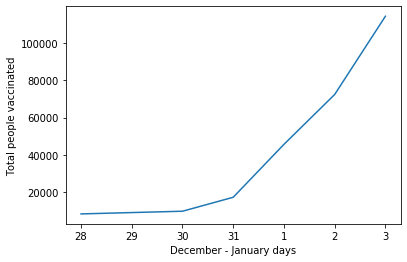

In [35]:
dates = pd.date_range(start="2020-12-28",end="2021-01-03").tolist()
x = [str(date.day) for date in dates]
y = [8361, 9082, 9803, 17291, 45667, 72397, 114349]

plt.plot(x, y)
plt.xlabel('December - January days')
plt.ylabel('Total people vaccinated')
plt.savefig('images/vaccine_total.png')

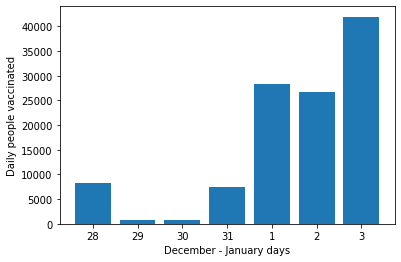

In [36]:
y_increment = []
last_value = 0
for index, value in enumerate(y):
    if(index == 0):
        y_increment.append(value)
    else:
        y_increment.append(value - last_value)
    last_value = value

plt.bar(x, y_increment)
plt.xlabel('December - January days')
plt.ylabel('Daily people vaccinated')
plt.savefig('images/vaccine_increment.png')